### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第75天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/05
### 改版日期:  
### 改版備註:

# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

### ANS:

In [18]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

In [19]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn0_history = [syn0]
# define syn1
syn1 = 2*np.random.random((4,1)) - 1
syn1_history = [syn1]

iter = 0
print(syn0_history)
print(syn1_history)
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）



[array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])]
[array([[-0.5910955 ],
       [ 0.75623487],
       [-0.94522481],
       [ 0.34093502]])]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [20]:
for iter in range(10000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # how much did we miss the target value?
    # l2_error 該值說明了神經網路預測時“丟失”的數目。
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。
    
    
    l2_error = y - l2
 
    if (iter% 2000) == 0:
        print( str(iter)+ ": L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (iter% 2000) == 0:
        print( str(iter)+ ": L1_Error:" + str(np.mean(np.abs(l1_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

0: L2_Error:0.4685343254580603
0: L1_Error:0.0767598135845312
2000: L2_Error:0.012098118827883315
2000: L1_Error:0.00048460819170707446
4000: L2_Error:0.008227317734746432
4000: L1_Error:0.00023860442483644362
6000: L2_Error:0.006592407764373811
6000: L1_Error:0.00015843550046387616
8000: L2_Error:0.005641272019557659
8000: L1_Error:0.0001186860552385652


Output After Training (根據 L1):
[[0.66946766 0.19647594 0.86093789 0.61025898]
 [0.58109006 0.13345707 0.8647569  0.55535307]
 [0.14847892 0.94448417 0.06339329 0.65683891]
 [0.10668013 0.91464415 0.06533669 0.60423949]]


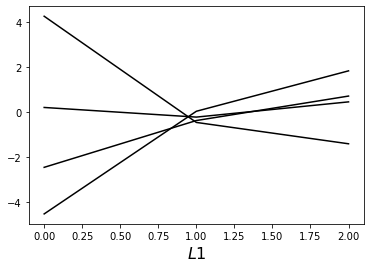

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
print("Output After Training (根據 L1):")
print(l1)
plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

Output After Training (根據 L2):
[[0.00510229]
 [0.00421887]
 [0.99493875]
 [0.99437164]]


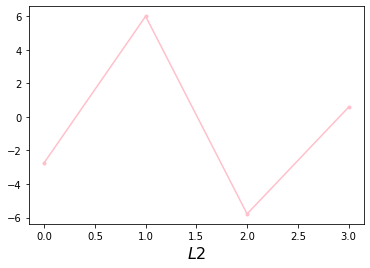

In [22]:
print("Output After Training (根據 L2):")
print(l2)
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()